In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Scientific Plotting with Matplotlib

We require plots, charts and other statistical graphics for the written communication of quantitative ideas.

They allow us to more easily convey relationships and reveal deviations from patterns.

Gelman and Unwin 2011:

> A well-designed graph can display more information than a table of the same size, and more information than numbers embedded in text. Graphical displays allow and encourage direct visual comparisons.

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures in Python. Some of the many advantages of this library includes:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled **programmatically**. This is important for reproducibility, convenient when one need to regenerate the figure with updated data or changes its appearance. 

The convention for loading Matplotlib is in its own shortened namespace:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# MATLAB-like API

As its name suggests, matplotlib is designed to compatible with MATLAB's plotting functions, so it is easy to get started with if you are familiar with MATLAB. 

### Example

Let's import some data and plot a simple figure with the MATLAB-like plotting API.

In [7]:
import numpy as np

rain = np.genfromtxt('data/nashville_precip.txt', delimiter='\t', 
                     names=True, missing_values='NA')

In [8]:
rain[:3]

array([ (1871.0, 2.76, 4.58, 5.01, 4.13, 3.3, 2.98, 1.58, 2.36, 0.95, 1.31, 2.13, 1.65),
       (1872.0, 2.32, 2.11, 3.14, 5.91, 3.09, 5.17, 6.1, 1.65, 4.5, 1.58, 2.25, 2.38),
       (1873.0, 2.96, 7.14, 4.11, 3.59, 6.31, 4.2, 4.63, 2.36, 1.81, 4.28, 4.36, 5.94)], 
      dtype=[('Year', '<f8'), ('Jan', '<f8'), ('Feb', '<f8'), ('Mar', '<f8'), ('Apr', '<f8'), ('May', '<f8'), ('Jun', '<f8'), ('Jul', '<f8'), ('Aug', '<f8'), ('Sep', '<f8'), ('Oct', '<f8'), ('Nov', '<f8'), ('Dec', '<f8')])

In [9]:
x = rain['Year']
y = rain['Jan']

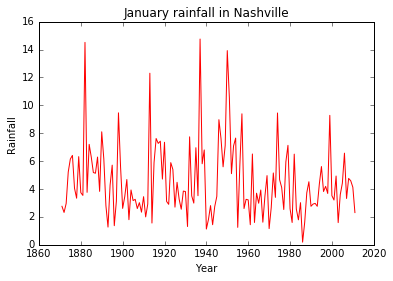

In [10]:
plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.title('January rainfall in Nashville')

It is straightforward to customize plotting symbols and create subplots.

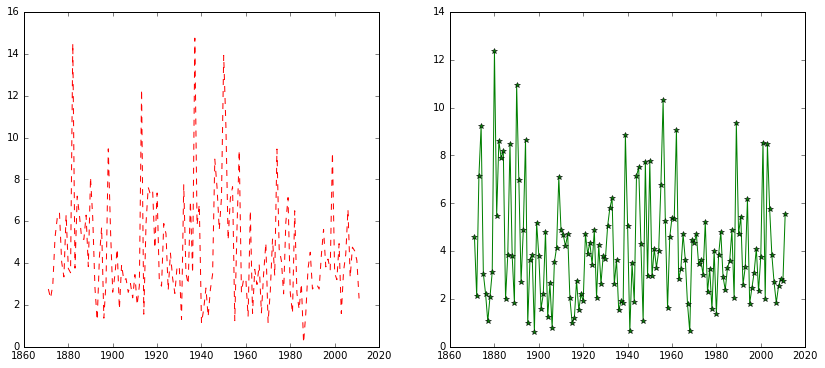

In [11]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(x, rain['Feb'], 'g*-')

### Exercise

Plot the two series on the same axes, and use a legend to label the series. (**Hint**: you must first give the original plot a `label`)

In [22]:
# Write your answer here

While the MATLAB-like API is easy and convenient, it is worth learning matplotlib's object-oriented plotting API. It is remarkably powerful and for advanced figures, with subplots, insets and other components it is very nice to work with. 

# Object-oriented API

The main idea with object-oriented programming is to have **objects** with associated methods and functions that operate on them, and no object or program states should be global.

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`.

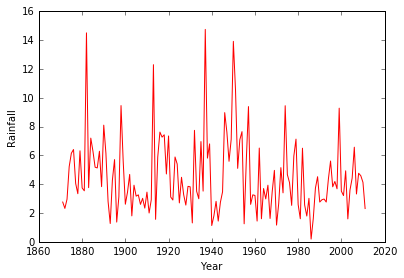

In [19]:
fig = plt.figure()

# left, bottom, width, height (range 0 to 1)
# as fractions of figure size
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

axes.plot(x, y, 'r', label='rainfall')

axes.set_xlabel('Year')
axes.set_ylabel('Rainfall')

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are place, and we can easily add more than one axis to the figure.

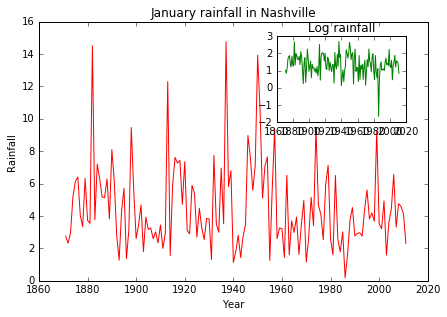

In [9]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.9]) # main axes
axes2 = fig.add_axes([0.65, 0.65, 0.3, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('Year')
axes1.set_ylabel('Rainfall')
axes1.set_title('January rainfall in Nashville');

# insert
axes2.plot(x, np.log(y), 'g')
axes2.set_title('Log rainfall');

If we don't care to be explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis **layout managers** in matplotlib, such as `subplots`.

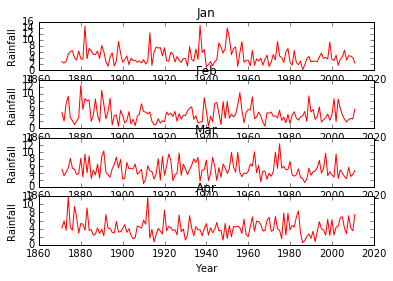

In [32]:
fig, axes = plt.subplots(nrows=4, ncols=1)

months = rain.dtype.names[1:]

for i,ax in enumerate(axes):
    ax.plot(x, rain[months[i]], 'r')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall')
    ax.set_title(months[i])
    

That was easy, but it's not so pretty with overlapping figure axes and labels, right?

We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

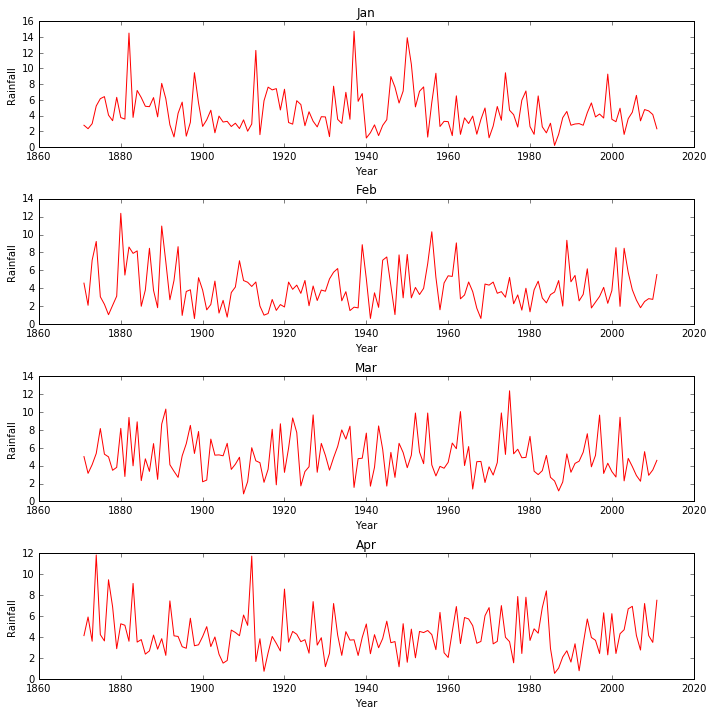

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,10))

months = rain.dtype.names[1:]

for i,ax in enumerate(axes):
    ax.plot(x, rain[months[i]], 'r')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall')
    ax.set_title(months[i])
    
fig.tight_layout()

### Exercise

Create a 2x2 grid of plots, rather than a single column. Think about how you would iterate over the axes in this case.

## Manipulating figure attributes

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple with width and height of the figure in inches, and `dpi` is the dot-per-inch (pixel per inch). To create a figure with size 800 by 400 pixels we can do: 

In [24]:
fig = plt.figure(figsize=(8,4), dpi=100)

The same arguments can also be passed to layout managers, such as the `subplots` function.

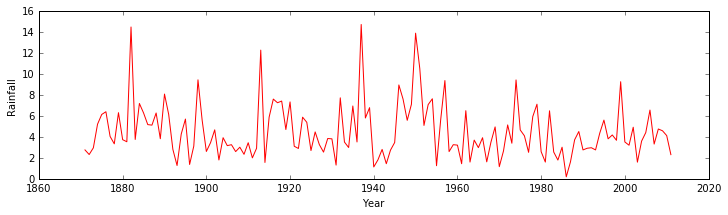

In [27]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('Year')
axes.set_ylabel('Rainfall')

## Saving figures

To save a figure a file we can use the `savefig` method in the `Figure` class. 

In [14]:
fig.savefig("jan_rainfall.png")

Notice that the graphic file format is inferred from the extension of the file name (though there is an optional `format` argument).

Here we can also optionally specify the DPI, and chose between different output formats.

In [29]:
fig.savefig("jan_rainfall.png", dpi=200)

In [30]:
fig.savefig("jan_rainfall.svg")

Matplotlib can generate high-quality output in a number formats, including:

* PNG
* JPG
* EPS
* SVG
* PDF

## Legends, labels and titles

Now that we covered the basics of how to create a figure canvas and adding axes instances to the canvas, let's look at how decorate a figure with titles, axis labels and legends:

**Figure titles**

A title can be added to each axis instance in a figure. To set the title use the `set_title` method in the axes instance:

In [33]:
ax.set_title("January rainfall")

**Axis labels**

Similarly, using the methods `set_xlabel` and `set_ylabel` we can set the labels of the X and Y axes:

In [34]:
ax.set_xlabel("Year")
ax.set_ylabel("Rainfall")

**Legends**

Legends to curves in a figure can be added in two ways. First method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the curves that have previously been added:

In [35]:
ax.legend(["Jan", "Feb"]);

A more robust method for associating labels with plots is to use the `label` keyword argument when plots a other objects are added to the figure, and then using the `legend` method without arguments to add the legend. 

In [36]:
ax.plot(x, rain['Jan'], label="Jan")
ax.plot(x, rain['Feb'], label="Feb")
ax.legend()

The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes and optional keywork argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn.

In [37]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner

The following figure show how to use the figure title, axis labels and legends described above:

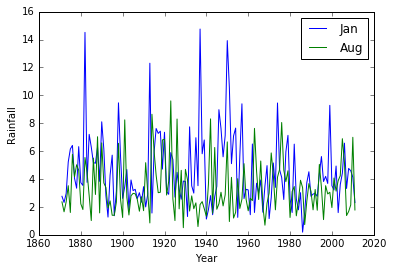

In [38]:
fig, ax = plt.subplots()

ax.plot(x, rain['Jan'], label="Jan")
ax.plot(x, rain['Aug'], label="Aug")
ax.set_xlabel('Year')
ax.set_ylabel('Rainfall')
ax.legend(loc=1); # upper left corner

## Text formatting

Matplotlib has great support for $\LaTeX$. All we need to do is to use dollar signs encapsulate $\LaTeX$ in the text, just as with Markdown and MathJax. 

In order to properly process $\LaTeX$ commands, which begin with a backslash, we must specify the $\LaTeX$ code as a *raw string*, by prepending the string with an "r". This is because the backslash is interpreted by Python as the escape code character. For example, rather than `"\alpha"` we use `r"\alpha"`.

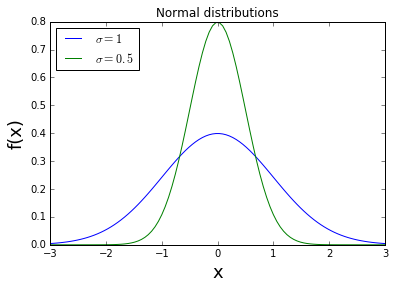

In [39]:
import scipy.stats as stats
fig, ax = plt.subplots()

x = np.linspace(-3, 3, 100)
y1 = stats.distributions.norm.pdf(x)
ax.plot(x, y1, label=r"$\sigma=1$")
y2 = stats.distributions.norm.pdf(x, scale=0.5)
ax.plot(x, y2, label=r"$\sigma=0.5$")
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('f(x)', fontsize=18)
ax.set_title('Normal distributions')
ax.legend(loc=2); # upper left corner

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [40]:
import matplotlib as mpl
# Update the matplotlib configuration parameters:
mpl.rcParams.update({'font.size': 18, 
                     'font.family': 'serif'})

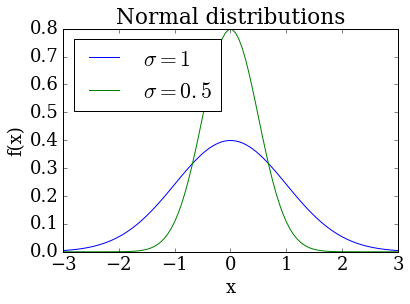

In [41]:
fig, ax = plt.subplots()

x = np.linspace(-3, 3, 100)
y1 = stats.distributions.norm.pdf(x)
ax.plot(x, y1, label=r"$\sigma=1$")
y2 = stats.distributions.norm.pdf(x, scale=0.5)
ax.plot(x, y2, label=r"$\sigma=0.5$")
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('f(x)', fontsize=18)
ax.set_title('Normal distributions')
ax.legend(loc=2); # upper left corner

In [42]:
# restore
mpl.rcParams.update({'font.size': 12, 'font.family': 'sans'})

A covenient approach for temporarily changing plotting options is to use a context manager:

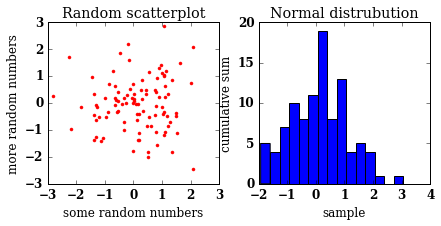

In [43]:
with mpl.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 8}):
    fig = plt.figure(figsize=(6,3))
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('some random numbers')
    ax1.set_ylabel('more random numbers')
    ax1.set_title("Random scatterplot")
    plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'r.')
    ax2 = fig.add_subplot(122)
    plt.hist(np.random.normal(size=100), bins=15)
    ax2.set_xlabel('sample')
    ax2.set_ylabel('cumulative sum')
    ax2.set_title("Normal distrubution")
    plt.tight_layout()
    plt.savefig("normalvars.png", dpi=150)

## Line and marker styles

### Colors

matplotlib uses a convenient MATLAB-like shorthand for specifying line and marker attributes for `plot`. For example, `b.-` specifies a blue line with dot markers.

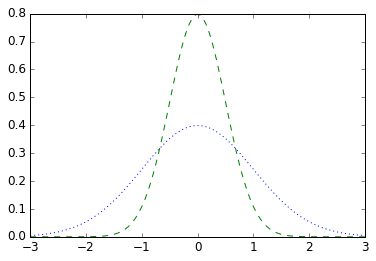

In [44]:
fig, ax = plt.subplots()
ax.plot(x, y1, 'b:') # blue dotted line
ax.plot(x, y2, 'g--') # green dashed line

### Exercise

Change the green series above to have a magenta dash-dot line.

If we want a broader range of colors, they can be specified by their name or RGB hex code using the `color` keyword. An `alpha` value can also be specified.

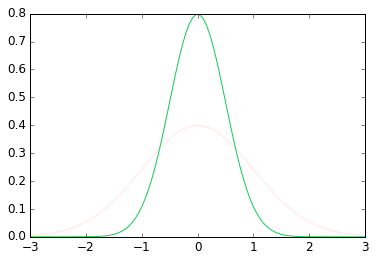

In [46]:
fig, ax = plt.subplots()

ax.plot(x, y1, color="red", alpha=0.1) # faint red
ax.plot(x, y2, color="#15cc55")        # RGB hex code for a greenish color

### Line and marker styles

To change the line width we can use the `linewidth` (or `lw`) keyword argument, and the line style can be selected using the `linestyle` (or `ls`) keyword arguments:

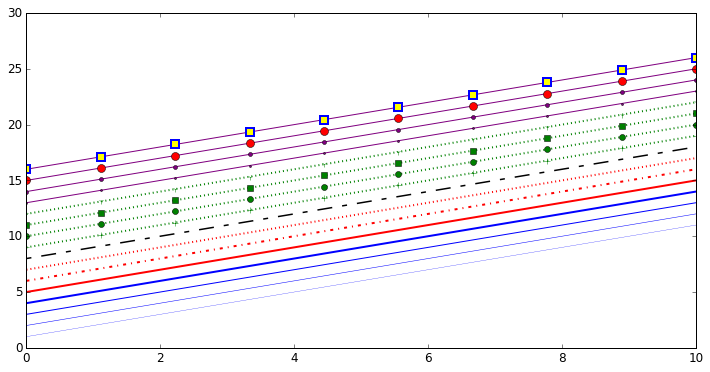

In [47]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.linspace(0, 10, 10)

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls=':', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls=':', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls=':', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls=':', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, 
        markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

## Control over axis apperance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. 

### Plot range

We can specify the axis range using the `set_ylim` and `set_xlim` methods of the axis object, or `axis('tight')` for automatrically setting axes ranges.

### Exercise

In the figure below, give the second set of axes a `tight` axis range, and constrain the x- and y-ranges of the third subplot to a subset of their respective ranges:

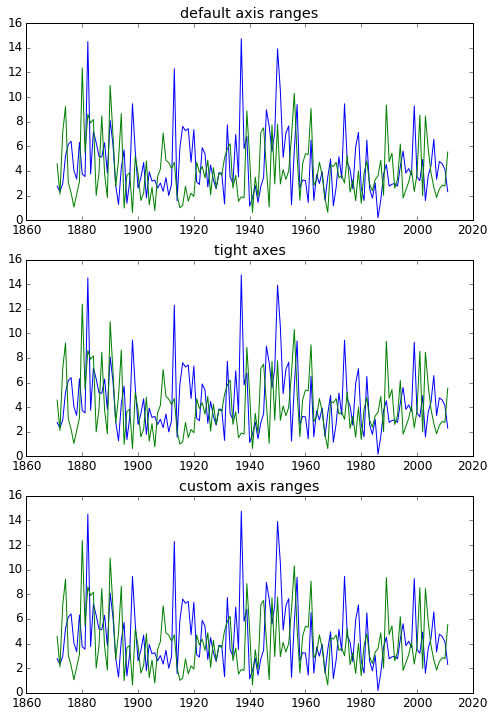

In [48]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

axes[0].plot(rain['Year'], rain['Jan'], rain['Year'], rain['Feb'])
axes[0].set_title("default axis ranges")

axes[1].plot(rain['Year'], rain['Jan'], rain['Year'], rain['Feb'])
axes[1].set_title("tight axes")

axes[2].plot(rain['Year'], rain['Jan'], rain['Year'], rain['Feb'])
axes[2].set_title("custom axis ranges");

### Ticks and tick labels

We can customize the placement of axis ticks using the `set_xticks` and `set_yticks` methods, which take a list of values for the tick locations. Similarly, we can use the methods `set_xticklabels` and `set_yticklabels` to provide a list of custom text labels for each tick.

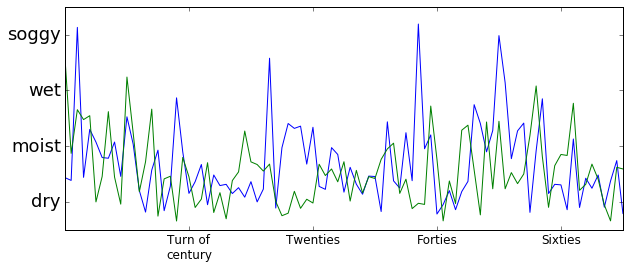

In [49]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(rain['Year'], rain['Jan'], rain['Year'], rain['Feb'])
ax.set_xlim(1880, 1970)

ax.set_xticks([1900, 1920, 1940, 1960])
ax.set_xticklabels(['Turn of\ncentury', 'Twenties', 'Forties', 'Sixties'], 
                   fontsize=12)

yticks = [2, 6, 10, 14]
ax.set_yticks(yticks)
ax.set_yticklabels(['dry', 'moist', 'wet', 'soggy'], fontsize=18)

### Axis grid

The axis method `grid` toggles grid lines in the plotting canvas. We can customize the appearence of the gridlines, using the same keywork arguments as with `plot`.

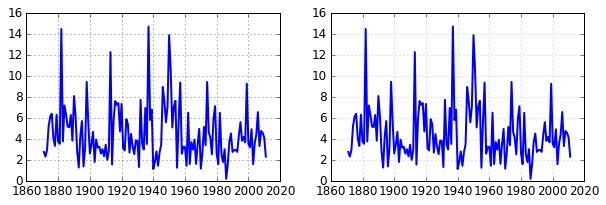

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(rain['Year'], rain['Jan'], linewidth=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(rain['Year'], rain['Jan'], linewidth=2)
axes[1].grid(color='b', alpha=0.5)

### Exercise

Give the second set of axes above a grid with a **dashed** line with a line width of 0.5.

### Axis spines

There are several methods for customizing the axis itself.

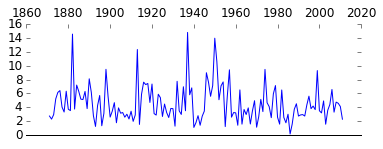

In [54]:
fig, ax = plt.subplots(figsize=(6,2))

ax.plot(rain['Year'], rain['Jan'])
ax.spines['top'].set_color('none')

ax.spines['left'].set_color('none')
ax.spines['left'].set_linewidth(2)

ax.spines['right'].set_color("none")
ax.xaxis.tick_top()

### Exercise

Change the color of the X-axis above from black to red.

### Secondary axes

Sometimes it is useful to have dual x or y axes in a figure, for example when plotting curves with differnt units together. Matplotlib supports this with the `twinx` and `twiny` functions:

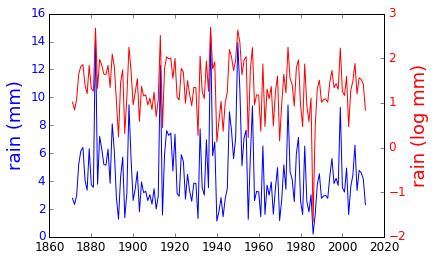

In [55]:
fig, ax1 = plt.subplots()

ax1.plot(rain['Year'], rain['Jan'], color='blue')
ax1.set_ylabel("rain (mm)", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(rain['Year'], np.log(rain['Jan']), color='red')
ax2.set_ylabel("rain (log mm)", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

Axes can be placed at arbitrary locations, with the commonest choice being $x=0$ and $y=0$.

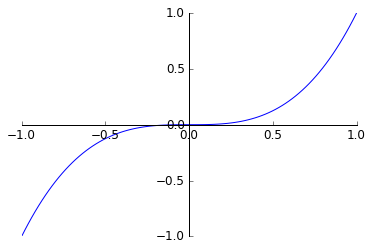

In [56]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Set location of x-axis
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) 

# Set location of y-axis
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   

x = np.linspace(-1, 1., 100)
ax.plot(x, x**3);

## Plot Types

There are a variety of plotting functions for generating common types of plots.

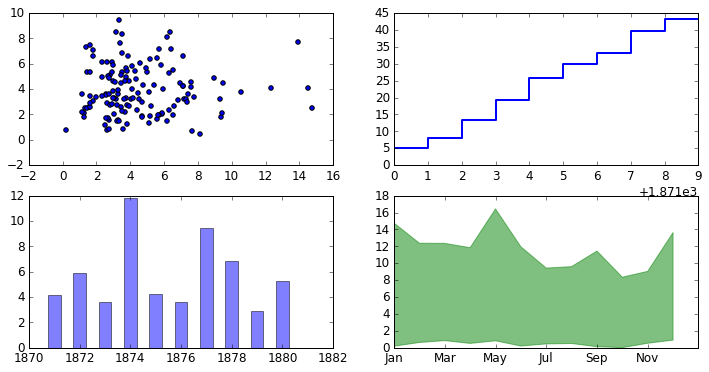

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(12,6))

axes[0,0].scatter(rain['Jan'], rain['Jul'])

axes[0,1].step(rain['Year'][:10], np.cumsum(rain['Jan'][:10]), lw=2)

axes[1,0].bar(rain['Year'][:10], rain['Apr'][:10], align="center", width=0.5, alpha=0.5)

minrain = [np.nanmin(rain[m]) for m in months]
maxrain = [np.nanmax(rain[m]) for m in months]
axes[1,1].fill_between(range(12), minrain, maxrain, color="green", alpha=0.5)
_ = axes[1,1].set_xticklabels(months[::2])

### Exercise: Histograms

Create a histogram of the 1000 normal random variates below, with 50 bins.

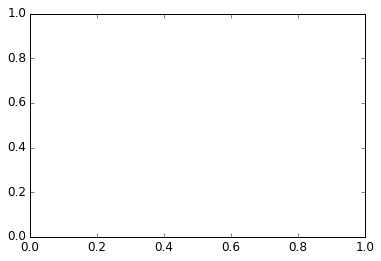

In [57]:
x = np.random.normal(size=1000)

fig, ax = plt.subplots()

Error bars

<Container object of 3 artists>

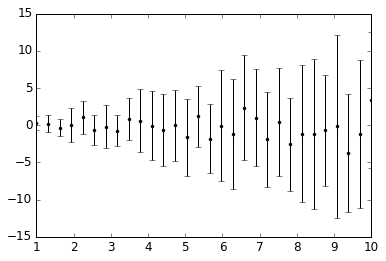

In [58]:
x = np.linspace(1, 10, 30)
y = [np.random.normal(0, xi, 20) for xi in x]

fig, ax = plt.subplots()
plt.errorbar(x, np.mean(y, 1), np.std(y, 1), fmt='.k')

Polar plot

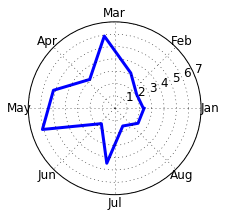

In [59]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 12)
ax.plot(t, list(rain[1])[1:], color='blue', lw=3)
_ = ax.set_xticklabels(months)

## Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

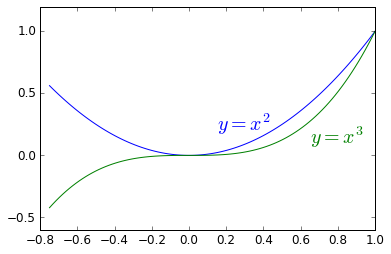

In [60]:
fig, ax = plt.subplots()

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

## Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `make_axes` or using sub-figure layout manager such as `subplots` or `subplot2grid` or `gridspec`:

### subplots

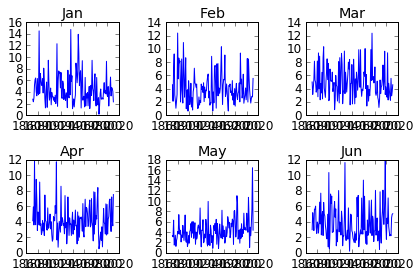

In [61]:
fig, ax = plt.subplots(2, 3)
for i,m in enumerate(months[:6]):
    (ax.ravel()[i]).plot(rain['Year'], rain[m])
    (ax.ravel()[i]).set_title(m)
fig.tight_layout()

### subplot2grid

`subplot2grid` is a helper function that is similar to `pyplot.subplot` but uses 0-based indexing and let subplot to occupy multiple cells.

To use subplot2grid, you provide geometry of the grid and the location of the subplot in the grid. For a simple single-cell subplot:

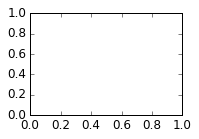

In [62]:
ax = plt.subplot2grid((2,2),(0, 0))

Here, the grid is specified by `shape=(2,2)`, at location of `loc=(0,0)`.

This is identical to:

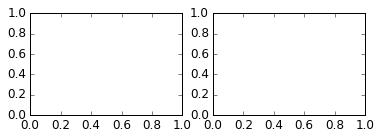

In [65]:
ax = plt.subplot(2,2,1)


It is handy when we are assembling a figure composed of heterogeneously-sized subplots.

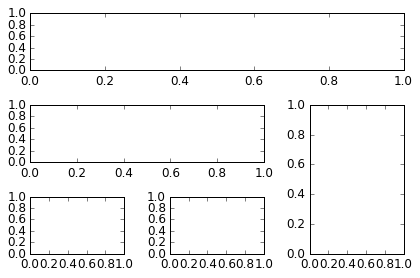

In [68]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

### gridspec

`gridspec` is a module which specifies the location of the subplot in the figure.

* `GridSpec` specifies the geometry of the grid that a subplot will be placed. The number of rows and number of columns of the grid need to be set. Optionally, the subplot layout parameters (e.g., left, right, etc.) can be tuned.
* `SubplotSpec` specifies the location of the subplot in the given GridSpec.

A `gridspec.GridSpec` instance provides array-like (2d or 1d) indexing that returns a `SubplotSpec` instance. For, SubplotSpec that spans multiple cells, use slice.

In [69]:
import matplotlib.gridspec as gridspec

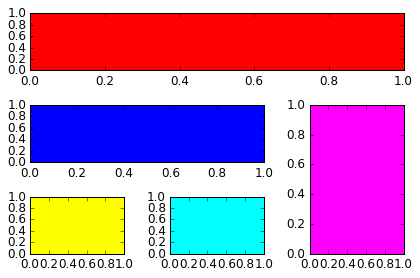

In [70]:
fig = plt.figure()

gs = gridspec.GridSpec(3, 3)
# identical to ax1 = plt.subplot(gs.new_subplotspec((0,0), colspan=3))
ax1 = plt.subplot(gs[0, :], axisbg='red')

ax2 = plt.subplot(gs[1,:-1], axisbg='blue')
ax3 = plt.subplot(gs[1:,-1], axisbg='magenta')
ax4 = plt.subplot(gs[-1,0], axisbg='yellow')
ax5 = plt.subplot(gs[-1,-2], axisbg='cyan')

plt.tight_layout()

### Adding axes

As we previewed above, adding axes with `add_axes` is useful for adding insets to figures:

(1949, 1961)

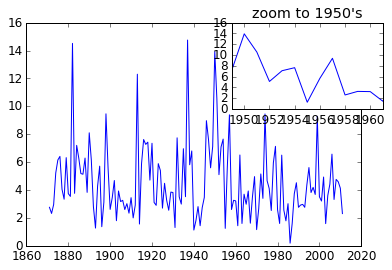

In [84]:
fig, ax = plt.subplots()

ax.plot(rain['Year'], rain['Jan'])

# inset
inset_ax = fig.add_axes([0.6, 0.6, 0.35, 0.3], axisbg='white') # X, Y, width, height

inset_ax.plot(rain['Year'], rain['Jan'])
inset_ax.set_title('zoom to 1950\'s')

# set inset axis range
inset_ax.set_xlim(1949, 1961)

## Colormap and contour

Colormaps and contour figures are useful for plotting functions of two variables, where we use a colormap to encode the third dimension.

For example, let's generate probabilities corresponding to a **bivariate normal** distribution across a grid in both dimensions:

In [85]:
from pymc.distributions import mv_normal_cov_like as mvnorm

x1 = x2 = np.linspace(-4, 4, 100)
mu = np.array([0,0])
Sigma = [[1, 0.5],[0.5, 1]]
z = np.array([[np.exp(mvnorm([xi,yi], mu, Sigma)) for xi in x1] for yi in x2])

#### pcolor

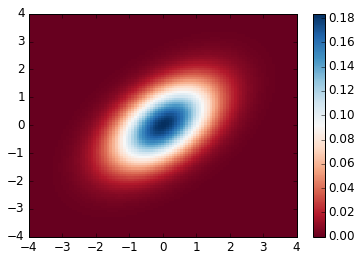

In [86]:
fig, ax = plt.subplots()

x, y = np.meshgrid(x1, x2)
p = ax.pcolor(x, y, z, cmap=mpl.cm.RdBu)
cb = fig.colorbar(p)

#### imshow

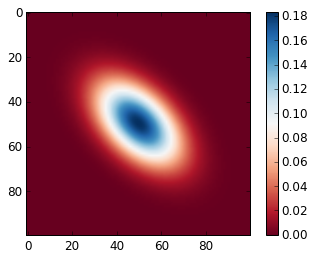

In [87]:
fig, ax = plt.subplots()

im = plt.imshow(z, cmap=mpl.cm.RdBu)
im.set_interpolation('bilinear')

cb = fig.colorbar(im)

### contour

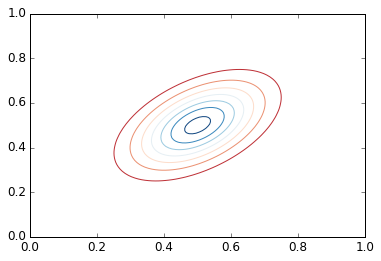

In [88]:
fig, ax = plt.subplots()

cnt = plt.contour(z, cmap=mpl.cm.RdBu, vmin=abs(z).min(), vmax=abs(z).max(), extent=[0, 1, 0, 1])

## 3D figures

To use 3D graphics in matplotlib, we first need to create an axes instance of the class `Axes3D`. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes, but a conventient way to create a 3D axis instance is to use the `projection='3d'` keyword argument to the `add_axes` or `add_subplot` functions.

In [89]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

### Surface plots

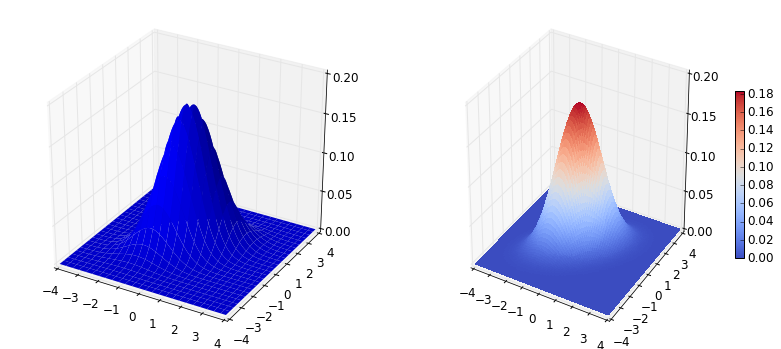

In [90]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(x, y, z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=mpl.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)


### Wire-frame plot

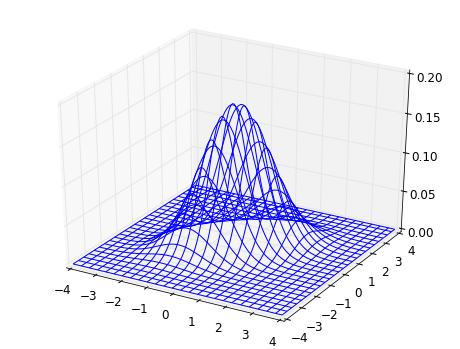

In [91]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(x, y, z, rstride=4, cstride=4)

### Coutour plots with projections

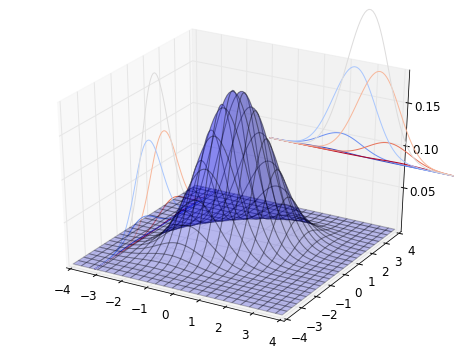

In [92]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(x, y, z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(x, y, z, zdir='z', offset=-np.pi, cmap=mpl.cm.coolwarm)
cset = ax.contour(x, y, z, zdir='x', offset=-np.pi, cmap=mpl.cm.coolwarm)
cset = ax.contour(x, y, z, zdir='y', offset=3*np.pi, cmap=mpl.cm.coolwarm)

### Change the view angle:

We can change the perspective of a 3D plot using the `view_init` function, which takes two arguments: the elevation and the azimuth angles (unit degrees)

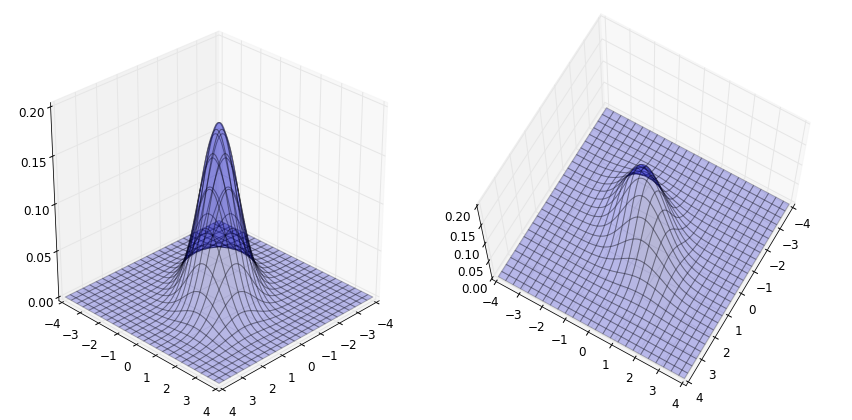

In [93]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(x, y, z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(x, y, z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()

## Backends

Matplotlib has a number of "backends", which are responsible for rendering graphs. The different backends are able to generate graphics with different formats or using different display technologies. There is a distinction between noninteractive backends (such as 'agg', 'svg', 'pdf', etc.) that are only used to generate images files (with for example the `savefig` function), and interactive backends (such as Qt4Agg, GTK, MaxOSX) that can display a GUI window for interactively exploring figures. 

A list of available backends are:

In [94]:
mpl.rcsetup.all_backends

['GTK',
 'GTKAgg',
 'GTKCairo',
 'MacOSX',
 'Qt4Agg',
 'Qt5Agg',
 'TkAgg',
 'WX',
 'WXAgg',
 'CocoaAgg',
 'GTK3Cairo',
 'GTK3Agg',
 'WebAgg',
 'nbAgg',
 'agg',
 'cairo',
 'emf',
 'gdk',
 'pdf',
 'pgf',
 'ps',
 'svg',
 'template']

The standard backend is called `agg`, and is based on a library for raster graphics and is great for generating raster formats such as PNG.

Normally we don't need to bother with changing the default backend, but sometimes it can be useful to switch to for example the PDF or GTKCairo (if you are using Linux) to produce high-quality vector graphics instead of raster based graphics. 

## xkcd plots

In [ ]:
%load http://matplotlib.org/mpl_examples/showcase/xkcd.py

## Exercise: Bootstrap resampling

To get some practice using Matplotlib, we will generate some data from various distributions and resample it, to visualize how bootstrapping preserves the properties of the original samples.

In [96]:
random_dists = ['Normal(1,1)',' Lognormal(1,1)', 'Exp(1)', 'Gumbel(6,4)',
              'Triangular(2,9,11)']
num_dists = len(random_dists)

N = 500
norm = np.random.normal(1,1, N)
logn = np.random.lognormal(1,1, N)
expon = np.random.exponential(1, N)
gumb = np.random.gumbel(6, 4, N)
tri = np.random.triangular(2, 9, 11, N)

Resampling is easy: we can simply generate random integers (with replacement) and use them to index the values of the original sample.

In [97]:
resample_indices = np.random.random_integers(0, N-1, N)
norm_resample = norm[resample_indices]
expon_resample = expon[resample_indices]
gumb_resample = gumb[resample_indices]
logn_resample = logn[resample_indices]
tri_resample = tri[resample_indices]

As closely as possible, try to replicate this plot:

![boxplot](images/boxplot_example.png)

## References

* [Scientific Python Lectures](http://github.com/jrjohansson/scientific-python-lectures) by Robert Johansson
* [Matplotlib project page](http://www.matplotlib.org)
* [Matplotlib tutorial](http://www.loria.fr/~rougier/teaching/matplotlib/)
